# Avaliação docente em fuzzy
---
### Autor: Matheus Felipe Paixão Honorato
matheuspaixaohonorato@gmail.com
### Sistema desenvolvido para trabalho de conclusão de curso - Sistemas de Informação | Unimontes
### Objetivo: avaliar docentes do centro de educação a distância da Unimontes por meio da lógica fuzzy

In [1]:
#Importando biblioteca para operações com listas 
import numpy as np

#Importanto biblioteca para gerar gráficos
import matplotlib.pyplot as plt

#alterando o tamanho padrão das legendas dos gráficos
plt.rcParams.update({'font.size': 30})

In [2]:
#passo utilizado para gerar universo de discurso dos conjuntos que compoem as variáveis de entrada

passo = 0.001

#os parâmetros utilizados definem as funcões de pertinência

#funcões triangulares para todas as variáveis de entrada

#cada linha determina uma função

variaveis_de_entrada = [
    [1, 1, 3.5], 
    [3, 3.5, 4],
    [3.5, 5, 5] 
]

variavel_de_saida = [
    [1, 1, 3.5],
    [3, 3.5, 4],
    [3.5, 5, 5]
]

#base de regras

#constantes entradas

BAIXO = 'baixo'
MEDIO = 'medio'
ALTO = 'alto'

#constantes saída

BAIXA = 'baixa'
MEDIA = 'media'
ALTA = 'alta'

#antecedente, antecedente, antecedente, antecedente, consequente
#cada coluna é uma questao ex: col1 = questao_um, col2 = questao_dois - obs: última coluna igual consequente

regras_da_dimensao_video_aulas = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, MEDIO, BAIXA],
    [MEDIO, MEDIO, BAIXO, BAIXO, MEDIA],
    [MEDIO, MEDIO, BAIXO, MEDIO, MEDIA],
    
    [BAIXO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, ALTO, BAIXO, MEDIA],
    [BAIXO, MEDIO, ALTO, MEDIO, MEDIA],
    [ALTO, BAIXO, MEDIO, MEDIO, MEDIA],
    
    [BAIXO, ALTO, MEDIO, BAIXO, MEDIA],
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, ALTO, MEDIO, ALTA],
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, MEDIO, ALTA],
    [MEDIO, MEDIO, ALTO, ALTO, MEDIA],
    
    [ALTO, BAIXO, BAIXO, MEDIO, MEDIA],
    [MEDIO, ALTO, BAIXO, MEDIO, MEDIA],
    [ALTO, MEDIO, MEDIO, BAIXO, MEDIA],
    [MEDIO, MEDIO, ALTO, ALTO, MEDIA],
    
    [ALTO, MEDIO, BAIXO, MEDIO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]
    
]

regras_da_dimensao_atividades_colaborativas = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, MEDIO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, MEDIO, BAIXA],
    
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    
    [ALTO, ALTO, ALTO, MEDIO, ALTA],
    [ALTO, MEDIO, ALTO, MEDIO, ALTA],
    [ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, MEDIO, ALTA],
    
    [MEDIO, BAIXO, MEDIO, BAIXO, MEDIA],
    [BAIXO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, BAIXO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, MEDIO, BAIXO, MEDIA],
    [MEDIO, BAIXO, MEDIO, ALTO, MEDIA],
    [BAIXO, ALTO, MEDIO, MEDIO, MEDIA],
    [BAIXO, MEDIO, ALTO, ALTO, MEDIA],
    [MEDIO, BAIXO, MEDIO, ALTO, MEDIA],
    
    [MEDIO, ALTO, MEDIO, ALTO, MEDIA],
    [ALTO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, ALTO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, ALTO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, MEDIO, ALTO, MEDIA],
    [MEDIO, ALTO, MEDIO, BAIXO, MEDIA],
    [ALTO, BAIXO, MEDIO, MEDIO, MEDIA],
    [ALTO, MEDIO, BAIXO, BAIXO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]

]

regras_da_dimensao_atividade_individual = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, MEDIO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, MEDIO, BAIXA],
    
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    
    [ALTO, ALTO, ALTO, MEDIO, MEDIA],
    [ALTO, MEDIO, ALTO, MEDIO, ALTA],
    [ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, MEDIO, ALTA],
    
    [MEDIO, ALTO, MEDIO, ALTO, MEDIA],
    [ALTO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, ALTO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, ALTO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, MEDIO, ALTO, MEDIA],
    [MEDIO, ALTO, MEDIO, BAIXO, MEDIA],
    [ALTO, BAIXO, MEDIO, MEDIO, MEDIA],
    [ALTO, MEDIO, BAIXO, BAIXO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]
    
]

regras_da_dimensao_foruns_de_discussao = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, MEDIO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, MEDIO, MEDIA],
    [MEDIO, MEDIO, BAIXO, BAIXO, MEDIA],
    
    [BAIXO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, ALTO, BAIXO, MEDIA],
    [BAIXO, MEDIO, ALTO, BAIXO, MEDIA],
    [ALTO, BAIXO, ALTO, MEDIO, MEDIA],
    
    [BAIXO, ALTO, MEDIO, BAIXO, MEDIA],
    [ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [BAIXO, ALTO, MEDIO, ALTO, ALTA],
    [ALTO, MEDIO, MEDIO, BAIXO, MEDIA],
    
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    
    [ALTO, ALTO, ALTO, MEDIO, ALTA],
    [ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, MEDIO, MEDIA],
    [ALTO, ALTO, MEDIO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, ALTO, ALTO, ALTA],
    [MEDIO, MEDIO, BAIXO, ALTO, ALTA],
    [MEDIO, MEDIO, MEDIO, ALTO, MEDIA],
    [ALTO, MEDIO, MEDIO, MEDIO, MEDIA],
    
    [BAIXO, MEDIO, MEDIO, ALTO, MEDIA],
    [MEDIO, ALTO, ALTO, BAIXO, MEDIA],
    [ALTO, BAIXO, BAIXO, MEDIO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]

]

regras_da_dimensao_webinars = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [MEDIO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, BAIXO, BAIXO, MEDIO, MEDIA],
    
    [MEDIO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, ALTO, BAIXO, MEDIA],
    [BAIXO, MEDIO, ALTO, MEDIO, MEDIA],
    [ALTO, BAIXO, ALTO, MEDIO, MEDIA],
    
    [BAIXO, ALTO, MEDIO, MEDIO, MEDIA],
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    [ALTO, ALTO, ALTO, MEDIO, ALTA],
    [MEDIO, MEDIO, ALTO, ALTO, ALTA],
    [ALTO, ALTO, MEDIO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, MEDIO, ALTO, MEDIA],
    [MEDIO, MEDIO, ALTO, MEDIO, MEDIA],
    [ALTO, MEDIO, BAIXO, MEDIO, MEDIA],
    [MEDIO, MEDIO, BAIXO, ALTO, MEDIA],
    
    [ALTO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]
    
]

regras_da_dimensao_avaliacoes_presenciais = [
    
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    
    [BAIXO, BAIXO, BAIXO, MEDIO, BAIXA],
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXA],
    [MEDIO, MEDIO, BAIXO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, MEDIO, BAIXA],
    
    [MEDIO, BAIXO, MEDIO, BAIXO, MEDIA],
    [BAIXO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, BAIXO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, MEDIO, BAIXO, MEDIA],
    [BAIXO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, BAIXO, MEDIO, ALTO, MEDIA],
    [BAIXO, ALTO, MEDIO, MEDIO, MEDIA],
    
    [BAIXO, MEDIO, MEDIO, ALTO, MEDIA],
    [ALTO, ALTO, ALTO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTA],
    [ALTO, MEDIO, ALTO, ALTO, ALTA],
    
    [ALTO, ALTO, MEDIO, ALTO, ALTA],
    [ALTO, ALTO, ALTO, MEDIO, ALTA],
    [ALTO, MEDIO, ALTO, MEDIO, ALTA],
    [MEDIO, MEDIO, ALTO, ALTO, ALTA],
    
    [MEDIO, ALTO, ALTO, MEDIO, ALTA],
    [MEDIO, ALTO, MEDIO, ALTO, MEDIA],
    [ALTO, MEDIO, MEDIO, MEDIO, MEDIA],
    [MEDIO, ALTO, MEDIO, MEDIO, MEDIA],
    
    [MEDIO, MEDIO, ALTO, MEDIO, MEDIA],
    [MEDIO, MEDIO, MEDIO, ALTO, MEDIA],
    [ALTO, ALTO, MEDIO, MEDIO, MEDIA],
    [MEDIO, ALTO, MEDIO, BAIXO, MEDIA],
    
    [ALTO, BAIXO, MEDIO, MEDIO, MEDIA],
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIA]
    
]

regras_da_dimensao_salas_virtuais = [
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    [MEDIO, MEDIO, BAIXO, BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXO, BAIXO, BAIXA],
    
    [MEDIO, MEDIO, BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    [MEDIO, BAIXO, BAIXO, BAIXO, MEDIO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, MEDIO, BAIXO, MEDIO, MEDIA],
    [BAIXO, BAIXO, BAIXO, MEDIO, MEDIO, MEDIO, MEDIA],
    
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXO, MEDIO, MEDIA],
    [MEDIO, BAIXO, MEDIO, MEDIO, BAIXO, MEDIO, MEDIA],
    [BAIXO, BAIXO, MEDIO, MEDIO, MEDIO, MEDIO, MEDIA],
    [ALTO, ALTO, ALTO, ALTO, ALTO, ALTO, ALTA],
    
    [MEDIO, MEDIO, MEDIO, MEDIO, MEDIO, MEDIO, MEDIA],
    [ALTO, MEDIO, ALTO, ALTO, MEDIO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [MEDIO, ALTO, ALTO, ALTO, ALTO, MEDIO, ALTA],
    
    [ALTO, MEDIO, ALTO, MEDIO, ALTO, ALTO, ALTA],
    [MEDIO, MEDIO, MEDIO, ALTO, ALTO, ALTO, ALTA],
    [BAIXO, ALTO, ALTO, MEDIO, MEDIO, ALTO, ALTA],
    [ALTO, BAIXO, MEDIO, ALTO, MEDIO, ALTO, ALTA],
    
    [BAIXO, MEDIO, BAIXO, ALTO, MEDIO, ALTO, ALTA],
    [MEDIO, BAIXO, ALTO, ALTO, BAIXO, ALTO, ALTA]
]

#cada coluna é a entrada de uma variável 

valores_de_entrada_questoes_dimensao_video_aulas = [3.9610, 3.8312, 3.6679, 3.6479] 
valores_de_entrada_questoes_dimensao_atividades_colaborativas = [3.9109, 3.2968, 3.7254, 3.5788] 
valores_de_entrada_questoes_dimensao_atividade_individual = [3.8182, 3.5937, 3.8126, 3.6531] 
valores_de_entrada_questoes_dimensao_foruns_de_discussao = [3.6549, 3.5584, 3.5955, 3.5306] 
valores_de_entrada_questoes_dimensao_webinars = [3.5158, 3.3840, 3.6419, 3.6679] 
valores_de_entrada_questoes_dimensao_avaliacoes_presenciais = [3.6401, 3.7829, 3.5918, 3.5993] 
valores_de_entrada_questoes_dimensao_salas_virtuais = [3.6939, 3.6419, 3.5937, 3.6271, 3.8219, 3.7477]          

In [3]:
def retornar_parametros_que_definem_funcao(variavel, funcao):
    
    if(variavel=='entrada'):
        if(funcao=='baixo'):
            return variaveis_de_entrada[0]
        if(funcao=='medio'):
            return variaveis_de_entrada[1]
        if(funcao=='alto'):
            return variaveis_de_entrada[2]
    if(variavel=='saida'):
        if(funcao=='baixa'):
            return variavel_de_saida[0]
        if(funcao=='media'):
            return variavel_de_saida[1]
        if(funcao=='alta'):
            return variavel_de_saida[2]

In [4]:
#geranado lista de valores eixo x das variáveis de entrada

parametros_entrada_funcao_baixo = retornar_parametros_que_definem_funcao('entrada','baixo')
parametros_entrada_funcao_medio = retornar_parametros_que_definem_funcao('entrada','medio')
parametros_entrada_funcao_alto = retornar_parametros_que_definem_funcao('entrada','alto')

universo_de_discurso_x_variaveis_de_entrada_funcao_baixo = np.arange(
    parametros_entrada_funcao_baixo[0], 
    parametros_entrada_funcao_baixo[-1], 
    passo
)
universo_de_discurso_x_variaveis_de_entrada_funcao_medio = np.arange(
    parametros_entrada_funcao_medio[0], 
    parametros_entrada_funcao_medio[-1], 
    passo
)
universo_de_discurso_x_variaveis_de_entrada_funcao_alto = np.arange(
    parametros_entrada_funcao_alto[0], 
    parametros_entrada_funcao_alto[-1], 
    passo
)

#geranado lista de valores eixo x da variável de saída

parametros_saida_funcao_baixo = retornar_parametros_que_definem_funcao('saida','baixa')
parametros_saida_funcao_medio = retornar_parametros_que_definem_funcao('saida','media')
parametros_saida_funcao_alto = retornar_parametros_que_definem_funcao('saida','alta')

universo_de_discurso_x_variavel_de_saida_funcao_baixo = np.arange(
    parametros_saida_funcao_baixo[0], 
    parametros_saida_funcao_baixo[-1], 
    passo
)
universo_de_discurso_x_variavel_de_saida_funcao_medio = np.arange(
    parametros_saida_funcao_medio[0], 
    parametros_saida_funcao_medio[-1], 
    passo
)
universo_de_discurso_x_variavel_de_saida_funcao_alto = np.arange(
    parametros_saida_funcao_alto[0], 
    parametros_saida_funcao_alto[-1], 
    passo
)

In [5]:
#definição da função de pertinência triangular

def triangular(x, parametros):
    resultado = 0
    a = parametros[0]
    b = parametros[1]
    c = parametros[2]
    valor_minimo = 0.0001
    resultado = max(min((x-a)/max(b-a,valor_minimo),(c-x)/max(c-b,valor_minimo)), 0)
    return resultado

In [6]:
#definição da função de pertinência triapezoidal

def trapezoidal(x, parametros):
    resultado = 0
    a = parametros[0]
    b = parametros[1]
    c = parametros[2]
    d = parametros[3]
    valor_minimo = 0.0001
    resultado = max(min((x-a)/max((b-a), valor_minimo),1,(d-x)/max((d-c), valor_minimo)),0)
    return resultado


In [7]:
def plotar_grafico(eixo_x_baixo, eixo_x_medio, eixo_x_alto, parametros_baixo, parametros_medio, parametros_alto, tipo, valor_x=0):
    #listas de pertinencias variáveis de entrada 

    valores_eixo_y_variavel_funcao_baixo = []
    valores_eixo_y_variavel_funcao_medio = []
    valores_eixo_y_variavel_funcao_alto = []

    #plotando gráfico variável 
    
    #definindo dimensões do gráfico
    
    plt.figure(figsize=(15,7))

    #inserindo valores em listas de pertinência de variáveis 
    
    if(tipo == 'entrada'):
        valor_label_baixo = 'Baixo'
        valor_label_medio = 'Médio'
        valor_label_alto = 'Alto'
    
    if(tipo == 'saida'):
        valor_label_baixo = 'Baixa'
        valor_label_medio = 'Média'
        valor_label_alto = 'Alta'

    for x_atual in eixo_x_baixo:
        if(len(parametros_baixo) == 3):
            valores_eixo_y_variavel_funcao_baixo.append(triangular(x_atual, parametros_baixo))
        if(len(parametros_baixo) == 4):
            valores_eixo_y_variavel_funcao_baixo.append(trapezoidal(x_atual, parametros_baixo))

    plt.plot(eixo_x_baixo, valores_eixo_y_variavel_funcao_baixo, label=valor_label_baixo, color='blue')
    plt.legend()
    
    for x_atual in eixo_x_medio:
        if(len(parametros_medio) == 3):
            valores_eixo_y_variavel_funcao_medio.append(triangular(x_atual, parametros_medio))
        if(len(parametros_medio) == 4):
            valores_eixo_y_variavel_funcao_medio.append(trapezoidal(x_atual, parametros_medio))

    plt.plot(eixo_x_medio, valores_eixo_y_variavel_funcao_medio, label=valor_label_medio, color='orange')
    plt.legend()
    
    for x_atual in eixo_x_alto:
        if(len(parametros_alto) == 3):
            valores_eixo_y_variavel_funcao_alto.append(triangular(x_atual, parametros_alto))
        if(len(parametros_alto) == 4):
            valores_eixo_y_variavel_funcao_alto.append(trapezoidal(x_atual, parametros_alto))

    plt.plot(eixo_x_alto, valores_eixo_y_variavel_funcao_alto, label=valor_label_alto, color='green')
    plt.legend()
    
    if(valor_x != 0):
        plt.axvline(x=valor_x, color='black')
    
    plt.xlabel("valor")
    plt.ylabel("Pertinência")
    plt.title(tipo)
    
    nome = tipo+str(valor_x)+'.png'
    
    plt.savefig(nome, format='png')

In [8]:
def gerar_pertinencias_regra(regra, entradas):
    resultado_regra = []
    for index, coluna_atual in enumerate(regra):
        if(coluna_atual == 'baixo'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_entrada_funcao_baixo)
            resultado_regra.append(pertinencia_na_funcao)
        if(coluna_atual == 'medio'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_entrada_funcao_medio)
            resultado_regra.append(pertinencia_na_funcao)
        if(coluna_atual == 'alto'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_entrada_funcao_alto)
            resultado_regra.append(pertinencia_na_funcao)
    return resultado_regra

In [9]:
def gerar_matriz_de_pertinencias_regras(regras, entradas):
    resultado_regras = []
    for regra_atual in regras:
        resultado_regra = gerar_pertinencias_regra(regra_atual, entradas)
        resultado_regras.append(resultado_regra)
    return resultado_regras

In [10]:
#método de inferencia = mamdani | MIN
def inferencia(regras, entradas, tipo='entrada'):
    
    matriz_de_pertinencias_regras = []
    pertinencias_consequente = []
    pertinencias_funcao_baixa = []
    pertinencias_funcao_media = []
    pertinencias_funcao_alta = []
    resultado = []
    
    for entrada in entradas:
        #plotando grafico das variáveis de saída
        plotar_grafico(
            universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
            universo_de_discurso_x_variavel_de_saida_funcao_medio, 
            universo_de_discurso_x_variavel_de_saida_funcao_alto, 
            parametros_saida_funcao_baixo,
            parametros_saida_funcao_medio, 
            parametros_saida_funcao_alto,
            tipo,
            entrada
        )
    
    matriz_de_pertinencias_regras = gerar_matriz_de_pertinencias_regras(regras, entradas)
               
    for linha_atual in matriz_de_pertinencias_regras:
        pertinencias_consequente.append(min(linha_atual))
                
    for index, pertinencia_atual in enumerate(pertinencias_consequente):
        if(regras[index][-1] == 'baixa'):
            pertinencias_funcao_baixa.append(pertinencia_atual)
        if(regras[index][-1] == 'media'):
            pertinencias_funcao_media.append(pertinencia_atual)
        if(regras[index][-1] == 'alta'):
            pertinencias_funcao_alta.append(pertinencia_atual)

    pertinencias_funcao_baixa.append(0)
    pertinencias_funcao_media.append(0)
    pertinencias_funcao_alta.append(0)
            
    resultado = [max(pertinencias_funcao_baixa),max(pertinencias_funcao_media),max(pertinencias_funcao_alta)]
    
    return resultado

In [11]:
def defuzzificacao(eixo_x_baixa, eixo_x_media, eixo_x_alta, valores_y):
               
    #método centroide    
    valores_numerador = []
    valores_numerador_grafico = []
    valores_denominador = []
    
    numerador = 0
    denominador = 0
    
    for x in eixo_x_baixa:
        if(triangular(x, parametros_entrada_funcao_baixo) <= valores_y[0]):
            valores_numerador.append(x*valores_y[0])
            valores_denominador.append(valores_y[0])
            valores_numerador_grafico.append(x)
            
    for x in eixo_x_media:
        if(triangular(x, parametros_entrada_funcao_medio) <= valores_y[1]):
            valores_numerador.append(x*valores_y[1])
            valores_denominador.append(valores_y[1])
            valores_numerador_grafico.append(x)

    
    for x in eixo_x_alta:
        if(triangular(x, parametros_entrada_funcao_alto) <= valores_y[2]):
            valores_numerador.append(x*valores_y[2])
            valores_denominador.append(valores_y[2])
            valores_numerador_grafico.append(x)


    numerador = sum(valores_numerador)
    denominador = sum(valores_denominador)
        
    if(denominador == 0):
        return 0
        
    #gerar_regiao_resultante(valores_numerador_grafico, valores_denominador)
   
    resultado = numerador/denominador
    
    return resultado

In [12]:
def sistema_fuzzzy():
    
    #calculando dimensão videoaulas
    resultado_inferencia_video_aulas = inferencia(
        regras_da_dimensao_video_aulas, 
        valores_de_entrada_questoes_dimensao_video_aulas
    )
    
    
    resultado_sistema_video_aulas = defuzzificacao(
        universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
        universo_de_discurso_x_variavel_de_saida_funcao_medio, 
        universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_video_aulas
    )
    print('Dimensão videoaulas: ', resultado_sistema_video_aulas)
    
    #calculando dimensão atividades colaborativas
    resultado_inferencia_atividades_colaborativas = inferencia(
        regras_da_dimensao_atividades_colaborativas, 
        valores_de_entrada_questoes_dimensao_atividades_colaborativas
    )
    resultado_avaliacao_atividades_colaborativas = defuzzificacao(
        universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
        universo_de_discurso_x_variavel_de_saida_funcao_medio, 
        universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_atividades_colaborativas
    )
    print('Dimensão atividades colaborativas: ', resultado_avaliacao_atividades_colaborativas)
    
    #calculando dimensão atividade individual
    resultado_inferencia_atividade_individual = inferencia(
        regras_da_dimensao_atividade_individual, 
        valores_de_entrada_questoes_dimensao_atividade_individual
    )
    resultado_avaliacao_atividade_individual = defuzzificacao(
       universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
       universo_de_discurso_x_variavel_de_saida_funcao_medio, 
       universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_atividade_individual
    )
    print('Dimensão atividade individual: ', resultado_avaliacao_atividade_individual)
    
    #calculando dimensão foruns de discussão
    resultado_inferencia_foruns_de_discussao = inferencia(
        regras_da_dimensao_foruns_de_discussao,
        valores_de_entrada_questoes_dimensao_foruns_de_discussao
    )
    resultado_avaliacao_foruns_de_discussao = defuzzificacao(
       universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
       universo_de_discurso_x_variavel_de_saida_funcao_medio, 
       universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_foruns_de_discussao
    )
    print('Dimensão fóruns de discussão: ', resultado_avaliacao_foruns_de_discussao)
    
    #calculando dimensão webinars
    resultado_inferencia_webinars = inferencia(
        regras_da_dimensao_webinars,
        valores_de_entrada_questoes_dimensao_webinars
    )
    resultado_avaliacao_webinars = defuzzificacao(
       universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
       universo_de_discurso_x_variavel_de_saida_funcao_medio, 
       universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_webinars
    )
    print('Dimensão webinars: ', resultado_avaliacao_webinars)
    
    #calculando dimensão avaliações presenciais
    resultado_inferencia_avaliacoes_presenciais = inferencia(
        regras_da_dimensao_avaliacoes_presenciais,
        valores_de_entrada_questoes_dimensao_avaliacoes_presenciais
    )
    resultado_avaliacao_avaliacoes_presenciais = defuzzificacao(
       universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
       universo_de_discurso_x_variavel_de_saida_funcao_medio, 
       universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_avaliacoes_presenciais
    )
    print('Dimensão avaliações presenciais: ', resultado_avaliacao_avaliacoes_presenciais)
    
    #calculando dimensão salas virtuais
    resultado_inferencia_salas_virtuais = inferencia(
        regras_da_dimensao_salas_virtuais,
        valores_de_entrada_questoes_dimensao_salas_virtuais
    )
    resultado_avaliacao_salas_virtuais = defuzzificacao(
       universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
       universo_de_discurso_x_variavel_de_saida_funcao_medio, 
       universo_de_discurso_x_variavel_de_saida_funcao_alto, resultado_inferencia_salas_virtuais
    )
    print('Dimensão salas virtuais: ', resultado_avaliacao_salas_virtuais)

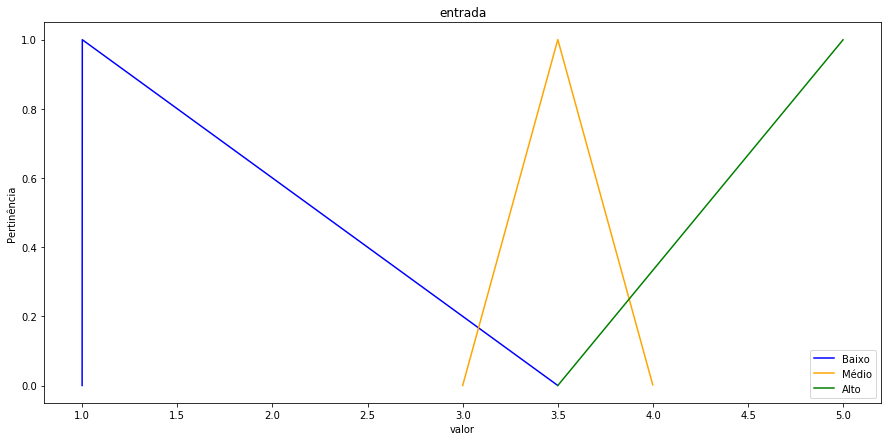

In [13]:
#plotando grafico das variáveis de entrada
plotar_grafico(
        universo_de_discurso_x_variaveis_de_entrada_funcao_baixo, 
        universo_de_discurso_x_variaveis_de_entrada_funcao_medio, 
        universo_de_discurso_x_variaveis_de_entrada_funcao_alto, 
        parametros_entrada_funcao_baixo,
        parametros_entrada_funcao_medio, 
        parametros_entrada_funcao_alto,
        'entrada'
    )

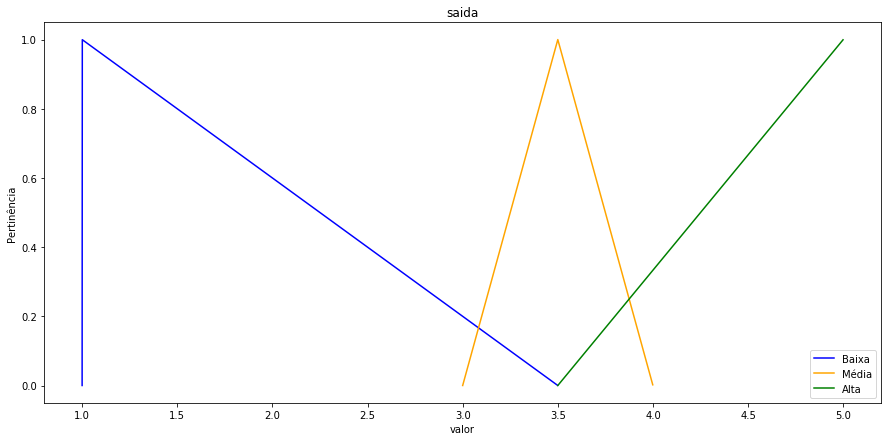

In [14]:
#plotando grafico das variáveis de saída
plotar_grafico(
        universo_de_discurso_x_variavel_de_saida_funcao_baixo, 
        universo_de_discurso_x_variavel_de_saida_funcao_medio, 
        universo_de_discurso_x_variavel_de_saida_funcao_alto, 
        parametros_saida_funcao_baixo,
        parametros_saida_funcao_medio, 
        parametros_saida_funcao_alto,
        'saida'
    )

Dimensão videoaulas:  3.6518727742676664
Dimensão atividades colaborativas:  3.533873694871285
Dimensão atividade individual:  3.5506751744279206
Dimensão fóruns de discussão:  3.4994188848417034
Dimensão webinars:  3.501351143045556


C:\Users\Matheus\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Dimensão avaliações presenciais:  3.5005656864298813
Dimensão salas virtuais:  3.50369984237768


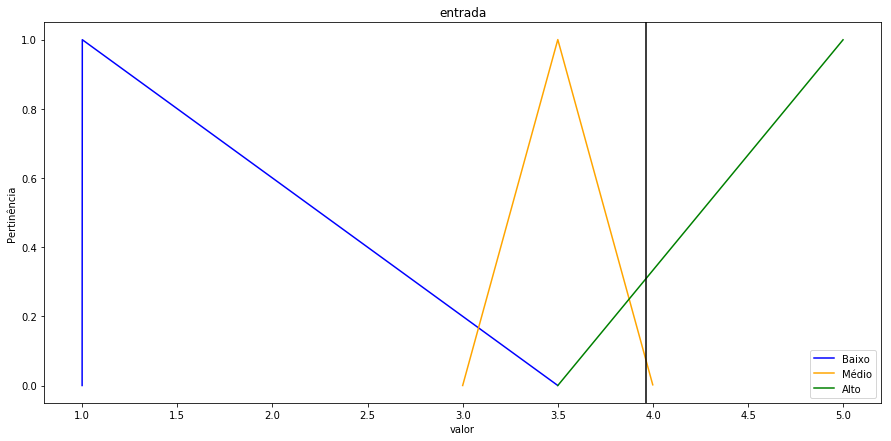

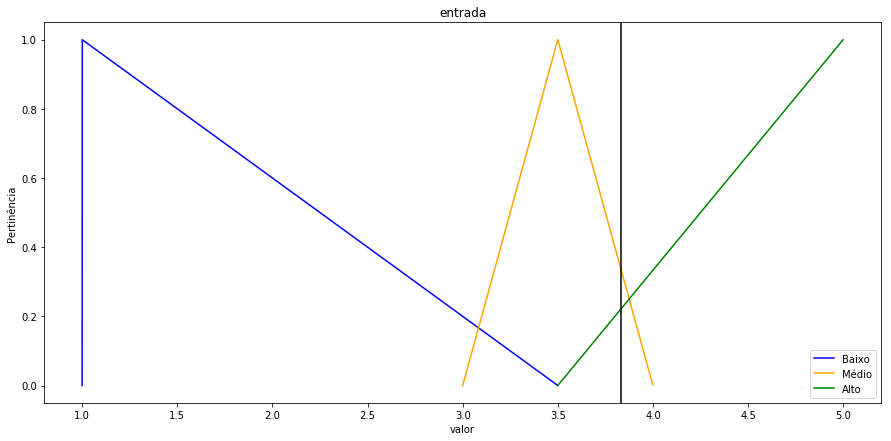

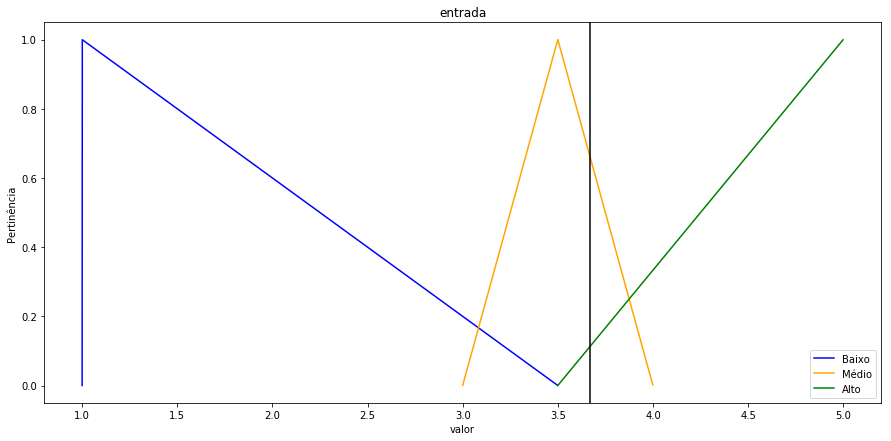

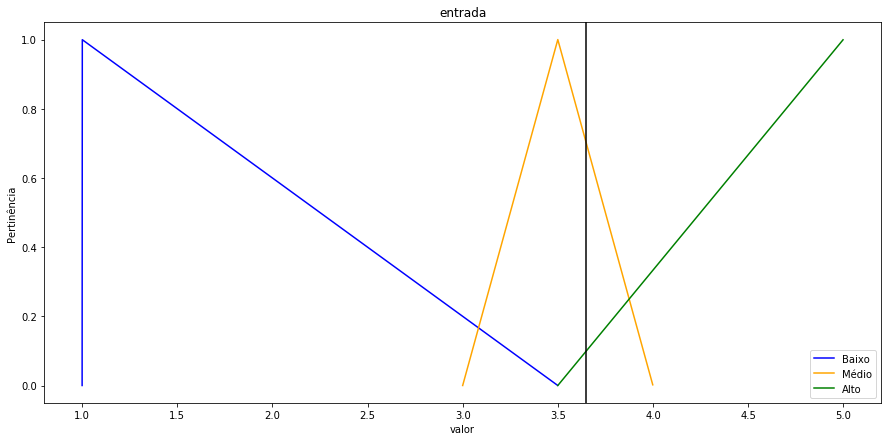

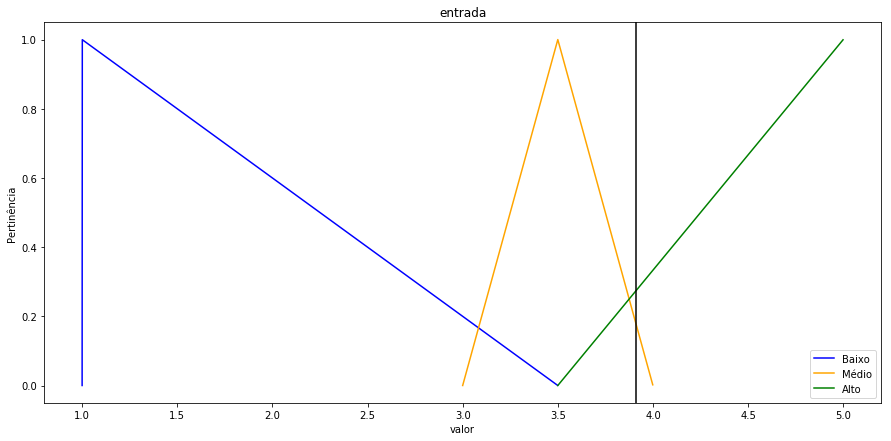

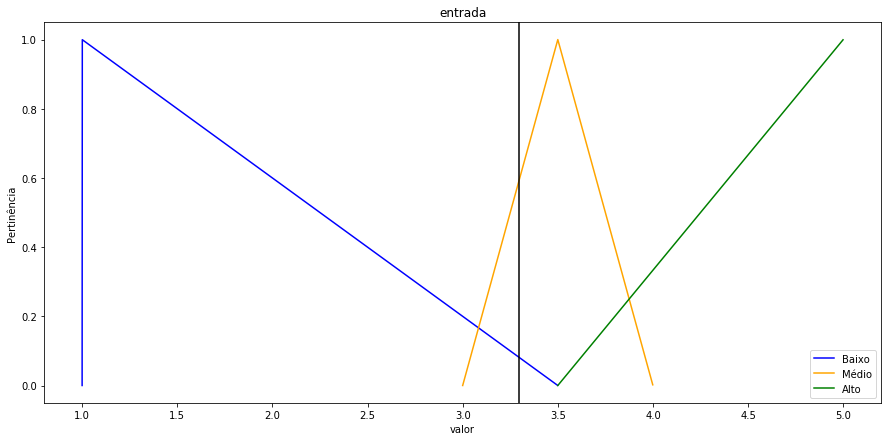

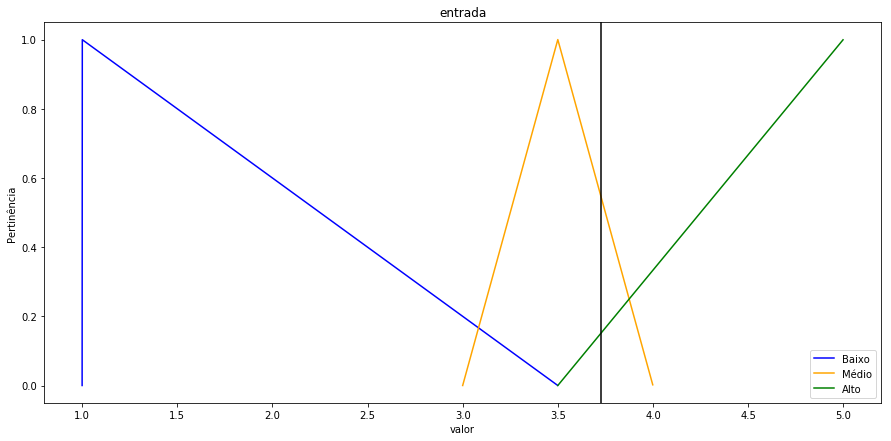

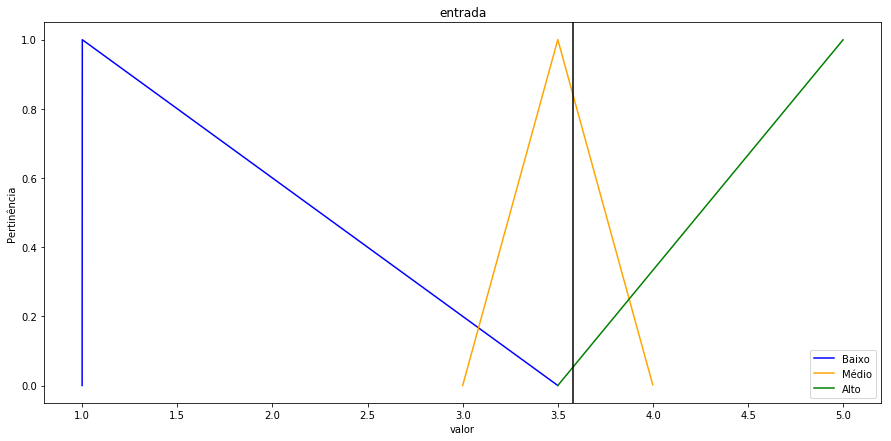

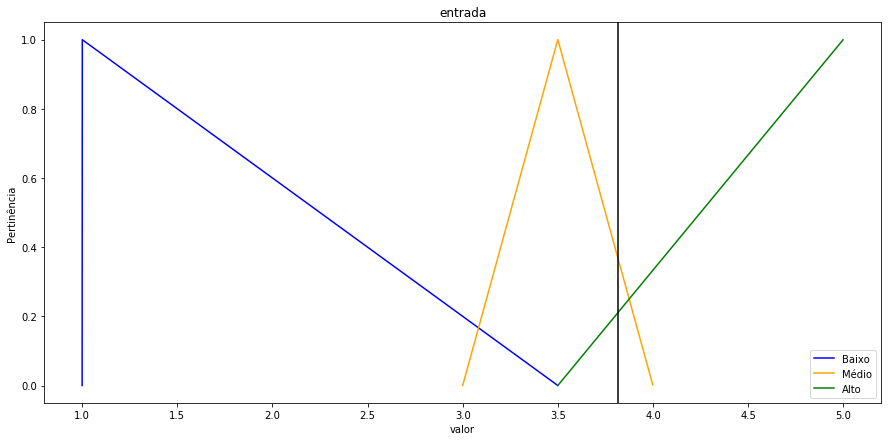

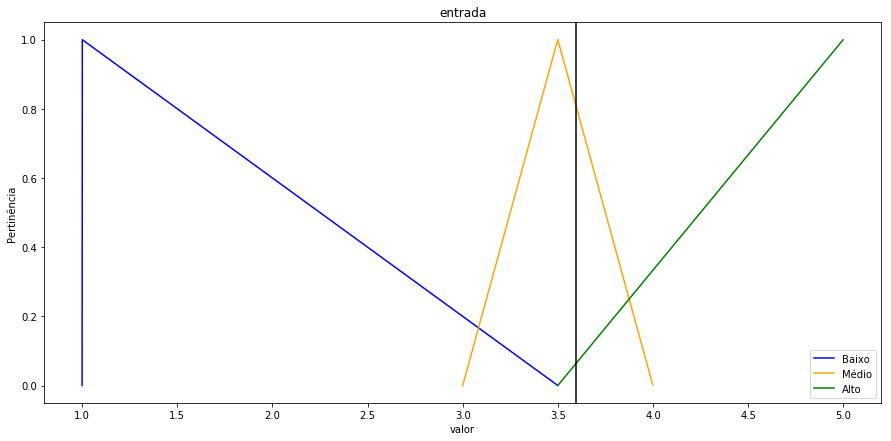

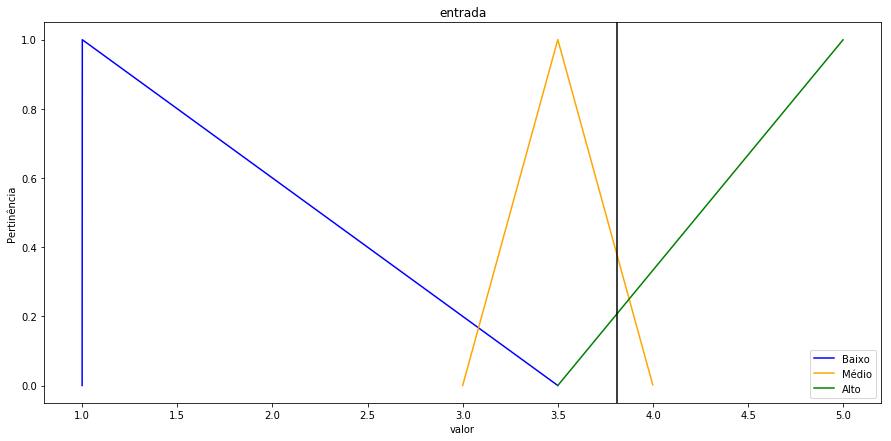

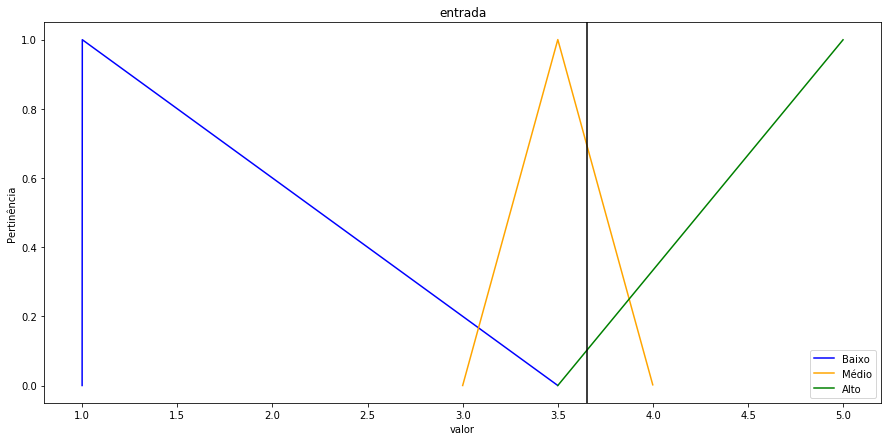

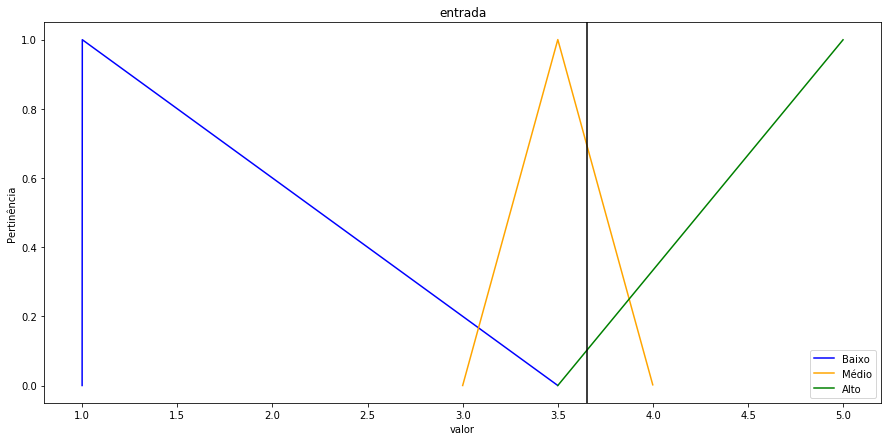

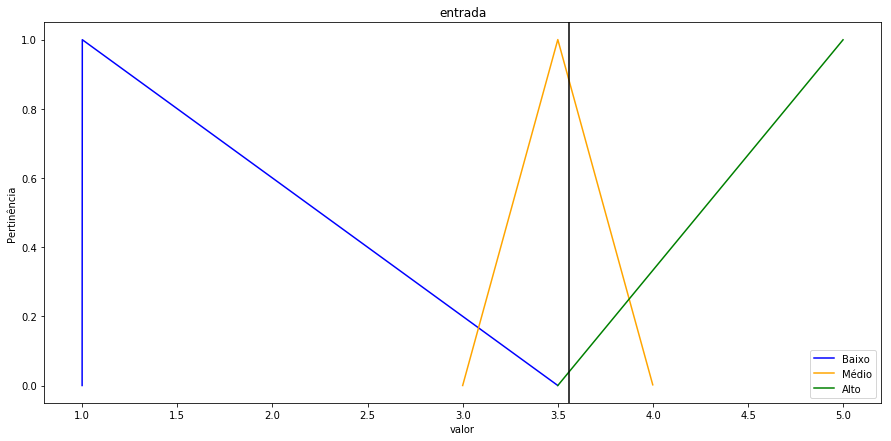

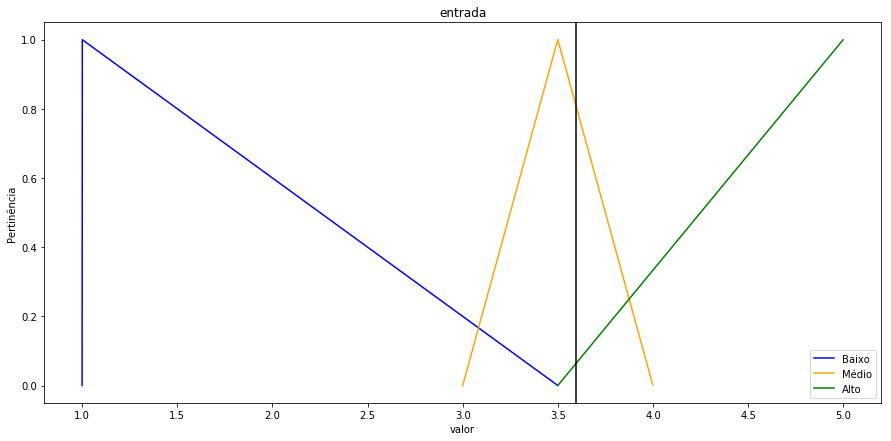

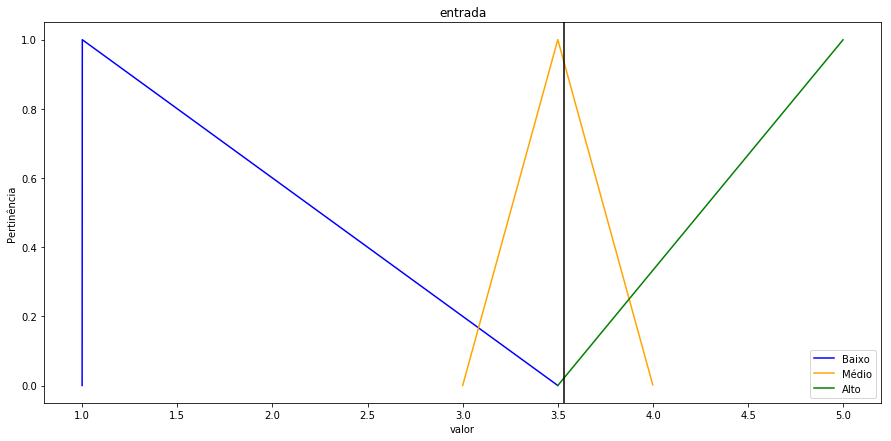

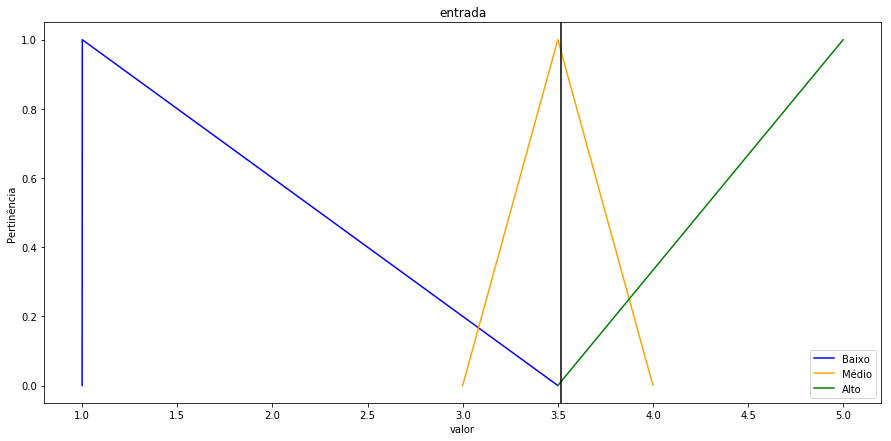

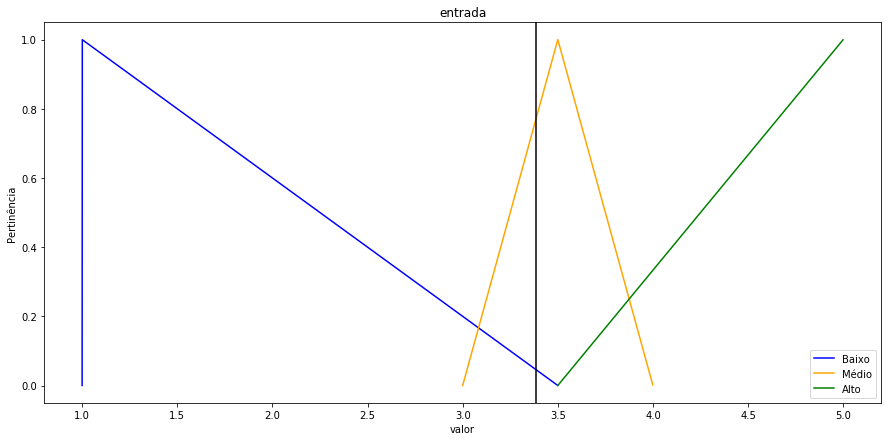

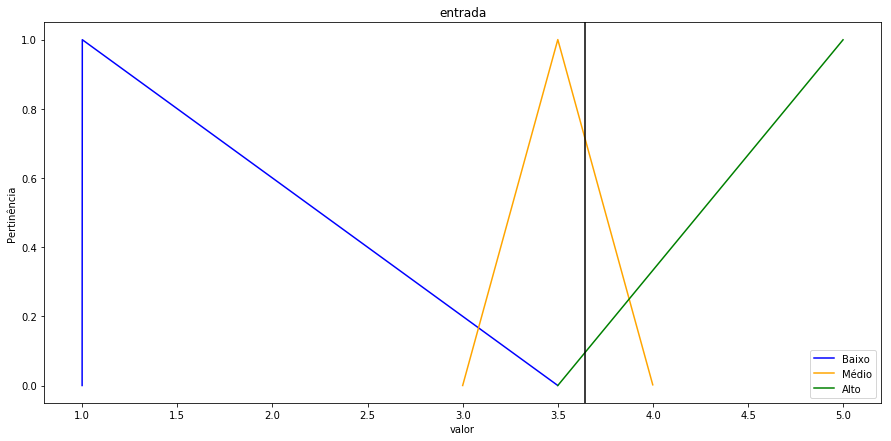

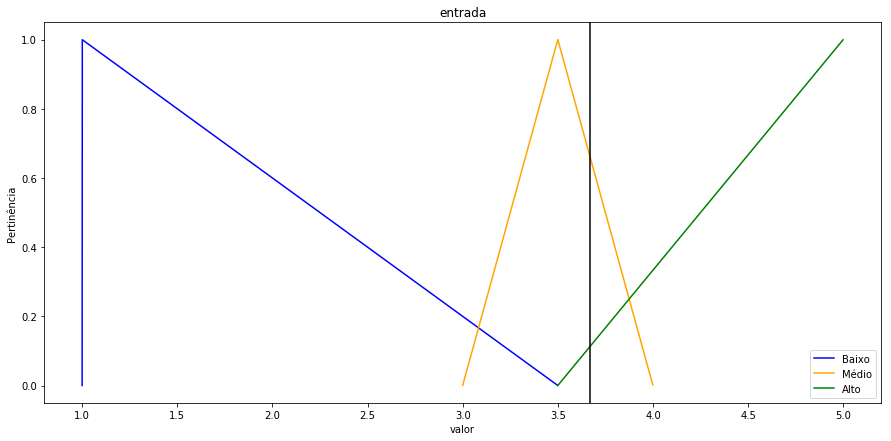

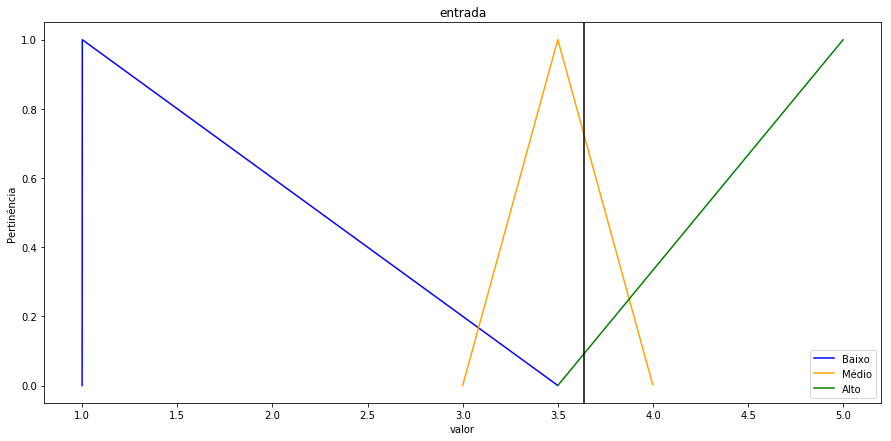

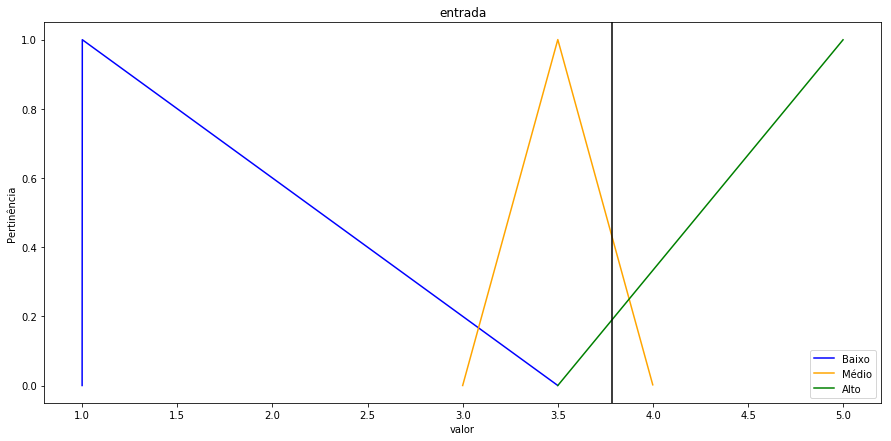

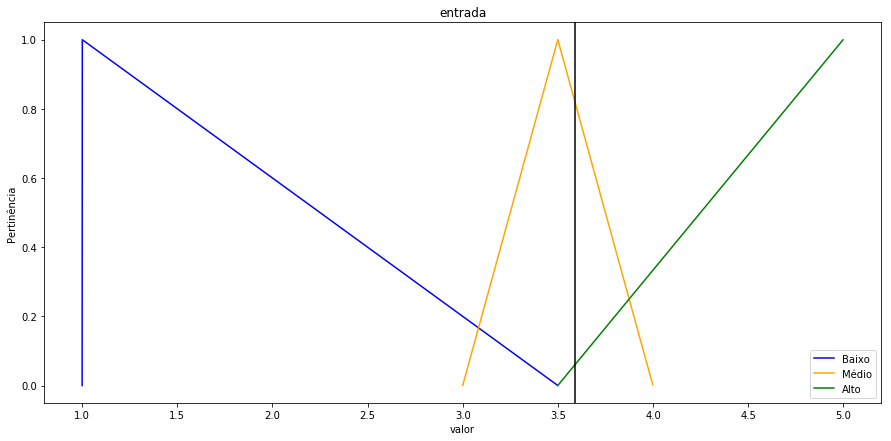

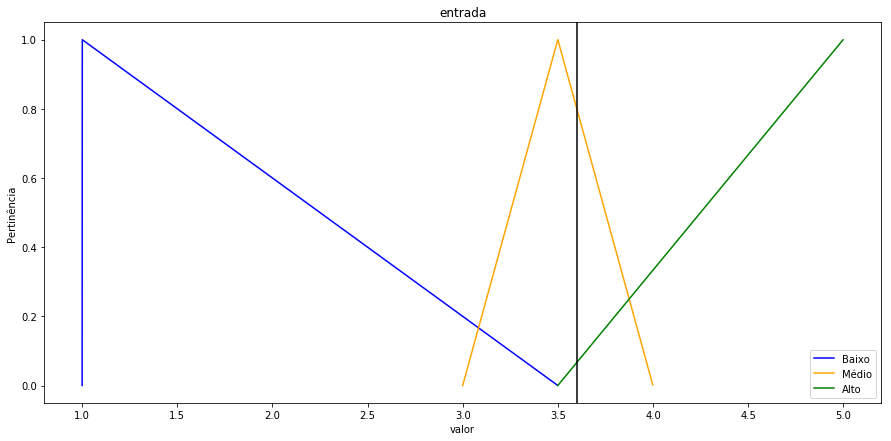

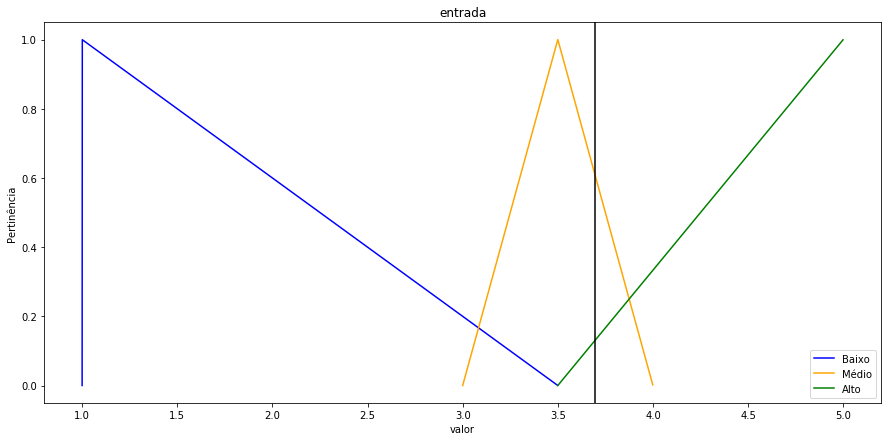

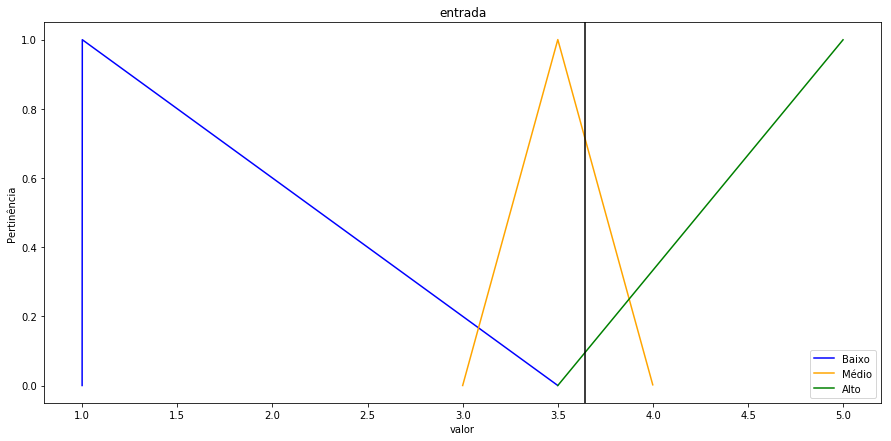

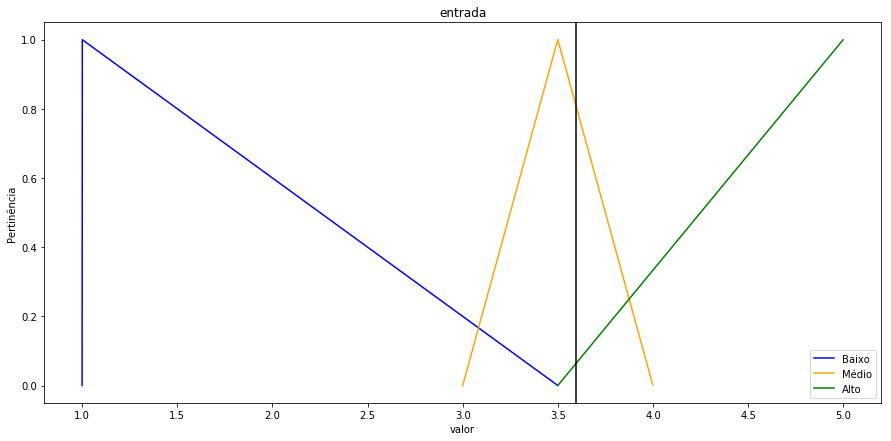

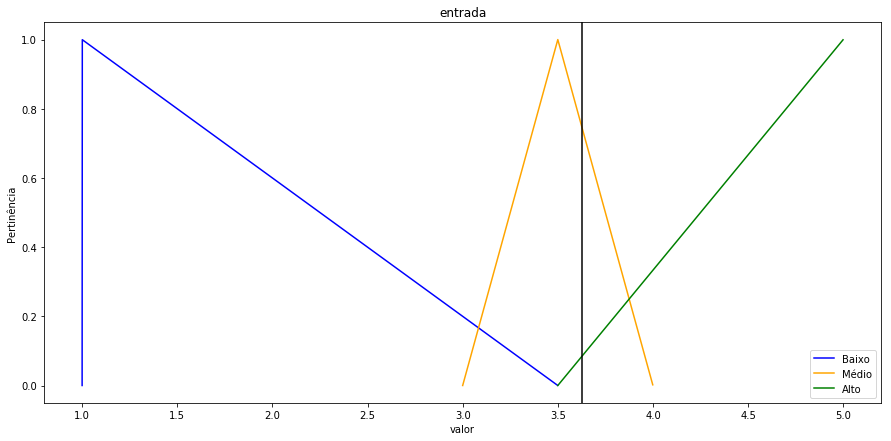

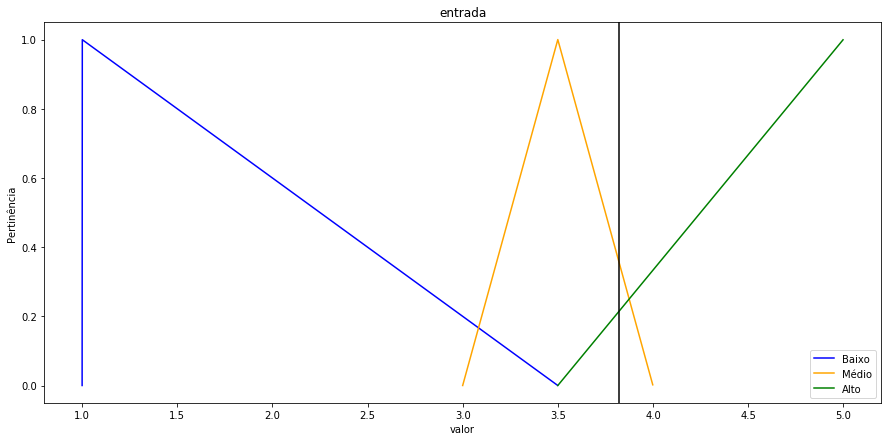

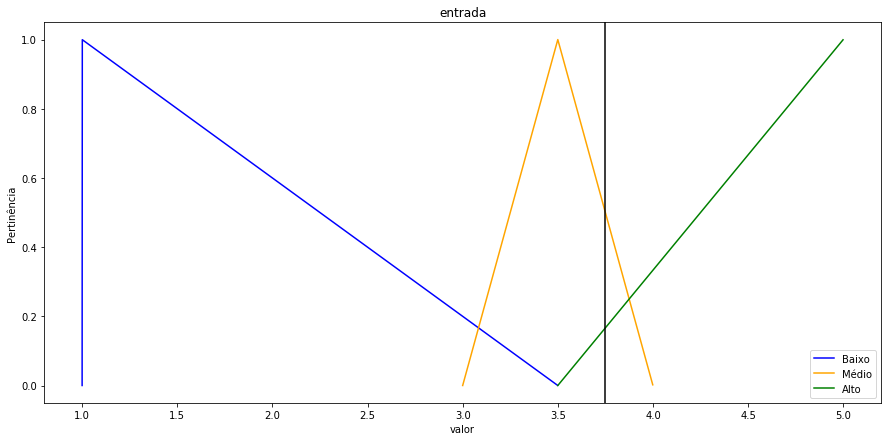

In [15]:
sistema_fuzzzy()